In [2]:
import tensorflow 
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

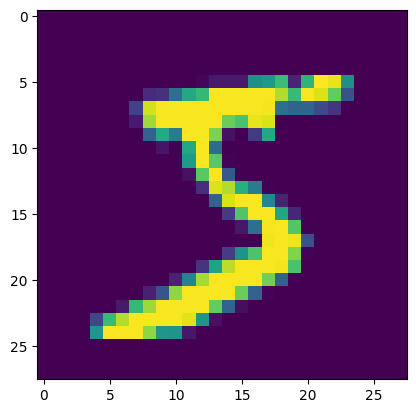

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.9979 - loss: 0.0060 - val_accuracy: 0.9737 - val_loss: 0.1816
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9763 - val_loss: 0.1742
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9764 - val_loss: 0.1750
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9760 - val_loss: 0.1812
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9974 - loss: 0.0088 - val_accuracy: 0.9771 - val_loss: 0.1783
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9751 - val_loss: 0.1936
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9732 - val_loss: 0.2237
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9981 -

In [13]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


In [14]:
p_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, p_pred)

0.9796

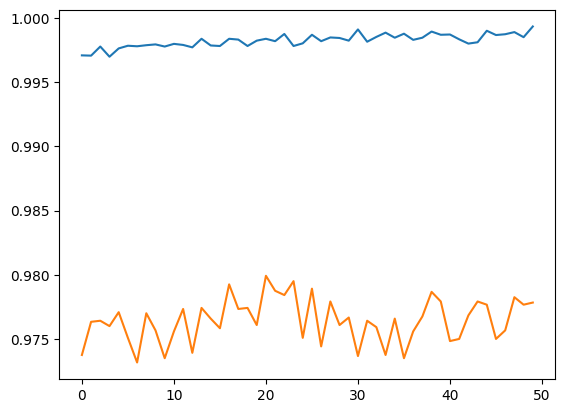

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

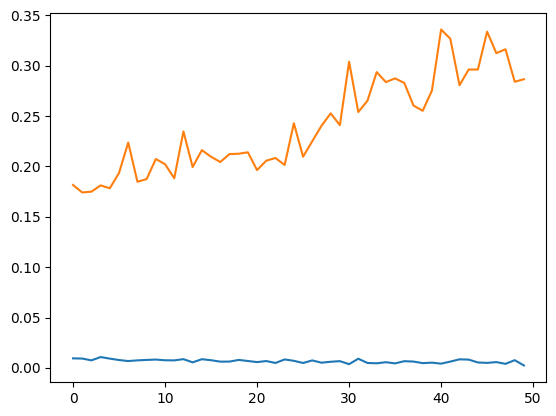

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

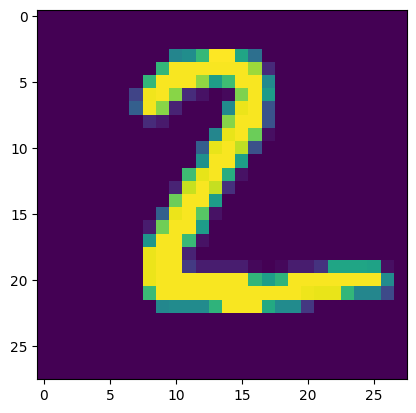

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([2], dtype=int64)